<a href="https://colab.research.google.com/github/BrajanNieto/MISTI/blob/main/2026_Kobe_FeatureEngineering_EXERCISES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**


# Feature Engineering with the Kobe Bryant Dataset

In [1]:
# Import Packages

# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as st

# plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

# scaling
from sklearn.preprocessing import StandardScaler

# classification algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression

# dimension reduction
from sklearn.decomposition import PCA

# cross-validation
from sklearn.model_selection import train_test_split

# model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# text mining
import re
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

## EXERCISE: Explore the Kobe Bryant Dataset

Explore the Kobe Bryant Dataset to understand what we may be able learn from it.

Tasks:
1. Get general information for the dataset using the methods `.head()`, `.tail()` and `.info()`.
2. Identify if there are any missing values using the method `.isnull()`.
3. Get summary statistics for the dataset using the method `.describe()`.
4. Identify potential target variables in this dataset.
5. Identify potential input features that could be used to predict your target variable.

In [4]:
# load the data as a pandas dataframe
KobeDataset = pd.read_csv('KobeData.csv', on_bad_lines='skip')
print("Data dimensions:" + str(KobeDataset.shape))

Data dimensions:(18792, 31)


### TASK 1: Get General Information of Dataset

In [7]:
# TASK 1 EXERCISE


# Preview the first few rows
print("\n--- Head of the DataFrame ---")
print(KobeDataset.head())

# Preview the last few rows
print("\n--- Tail of the DataFrame ---")
print(KobeDataset.tail())

# Check all columns and data types
print("\n--- DataFrame Info ---")
KobeDataset.info()


--- Head of the DataFrame ---
         action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  ...  game_date  \
0    167     72 -118.1028                 10       1  ...   10/31/00   
1   -157      0 -118.4268                 10       1  ...   10/31/00   
2   -101    135 -118.3708                  7       1  ...   10/31/00   
3    138    175 -118.1318                  6       1  ...   10/31/00   
4      0      0 -118.2698                  6       2  ...   10/31/00   

     matchup  opponent  shot_id  New Away Game Days of Experience Points 

### TASK 2: Identify any missing data

In [8]:
# TASK 2 EXERCISE

# Check for missing values
print("\n--- Missing Values ---")
print(KobeDataset.isnull().sum())


--- Missing Values ---
action_type               0
combined_shot_type        0
game_event_id             0
game_id                   0
lat                       0
loc_x                     0
loc_y                     0
lon                       0
minutes_remaining         0
period                    0
playoffs                  0
season                    0
seconds_remaining         0
shot_distance             1
shot_made_flag         3018
shot_type                 0
shot_zone_area            0
shot_zone_basic           0
shot_zone_range           0
team_id                   1
team_name                 1
game_date                 1
matchup                   1
opponent                  1
shot_id                   1
New                       1
Away Game                 1
Days of Experience        1
Points                    1
OverTime                  1
Divisional Opponent       1
dtype: int64


### TASK 3: Generate Summary Statistics

In [9]:
# TASK 3 EXERCISE

# Get summary statistics for numeric columns
print("\n--- Summary Statistics (Numeric) ---")
print(KobeDataset.describe())


--- Summary Statistics (Numeric) ---
       game_event_id       game_id           lat         loc_x         loc_y  \
count   18792.000000  1.879200e+04  18792.000000  18792.000000  18792.000000   
mean      246.506332  2.053075e+07     33.953767      8.164485     90.533259   
std       148.580110  3.269068e+05      0.087151    110.782688     87.151223   
min         2.000000  2.000001e+07     33.303300   -246.000000    -44.000000   
25%       108.000000  2.020098e+07     33.885300    -69.000000      2.000000   
50%       250.000000  2.050104e+07     33.969300      0.000000     75.000000   
75%       363.000000  2.080071e+07     34.042300    100.000000    159.000000   
max       639.000000  2.110047e+07     34.088300    248.000000    741.000000   

                lon  minutes_remaining        period  playoffs  \
count  18792.000000       18792.000000  18792.000000   18792.0   
mean    -118.261636           4.890379      2.519157       0.0   
std        0.110783           3.456321     

## Explore Data Types

In [10]:
# we will narrow our focus to only the 15 features listed above
KobeDataset = KobeDataset.filter(["action_type", "loc_x", "loc_y","shot_distance", "shot_zone_basic", "shot_zone_area", "shot_type",
                                  "period", "minutes_remaining", "seconds_remaining", "playoffs", "season", "game_date","matchup", "shot_made_flag"])

print("Filtered Data dimensions:" + str(KobeDataset.shape))

# display the first 10 lines
display(KobeDataset.head(10))

Filtered Data dimensions:(18792, 15)


,action_type,loc_x,loc_y,shot_distance,shot_zone_basic,shot_zone_area,shot_type,period,minutes_remaining,seconds_remaining,playoffs,season,game_date,matchup,shot_made_flag
0,Jump Shot,167,72,18.0,Mid-Range,Right Side(R),2PT Field Goal,1,10,27,0,2000-01,10/31/00,LAL @ POR,NaN
1,Jump Shot,-157,0,15.0,Mid-Range,Left Side(L),2PT Field Goal,1,10,22,0,2000-01,10/31/00,LAL @ POR,0.0
2,Jump Shot,-101,135,16.0,Mid-Range,Left Side Center(LC),2PT Field Goal,1,7,45,0,2000-01,10/31/00,LAL @ POR,1.0
3,Jump Shot,138,175,22.0,Mid-Range,Right Side Center(RC),2PT Field Goal,1,6,52,0,2000-01,10/31/00,LAL @ POR,0.0
4,Driving Dunk Shot,0,0,0.0,Restricted Area,Center(C),2PT Field Goal,2,6,19,0,2000-01,10/31/00,LAL @ POR,1.0
5,Jump Shot,-145,-11,14.0,Mid-Range,Left Side(L),2PT Field Goal,3,9,32,0,2000-01,10/31/00,LAL @ POR,0.0
6,Layup Shot,0,0,0.0,Restricted Area,Center(C),2PT Field Goal,3,8,52,0,2000-01,10/31/00,LAL @ POR,1.0
7,Jump Shot,1,28,2.0,Restricted Area,Center(C),2PT Field Goal,3,8,5,0,2000-01,10/31/00,LAL @ POR,NaN
8,Jump Shot,-65,108,12.0,In The Paint (Non-RA),Left Side(L),2PT Field Goal,3,6,12,0,2000-01,10/31/00,LAL @ POR,1.0
9,Running Jump Shot,-33,125,12.0,In The Paint (Non-RA),Center(C),2PT Field Goal,3,3,36,0,2000-01,10/31/00,LAL @ POR,0.0


In [11]:
# We can use .iloc to see single rows at a time, and .unique() to see the unique values in a feature

display(KobeDataset['action_type'].unique())
print()
KobeDataset.iloc[[2]]

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Driving Layup Shot', 'Reverse Layup Shot',
       'Reverse Dunk Shot', 'Slam Dunk Shot', 'Turnaround Jump Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Running Tip Shot',
       'Jump Hook Shot', 'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Reverse Layup Shot',
       'Driving Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Reverse Slam Dunk Shot', 'Turnaround Bank shot',
   

,action_type,loc_x,loc_y,shot_distance,shot_zone_basic,shot_zone_area,shot_type,period,minutes_remaining,seconds_remaining,playoffs,season,game_date,matchup,shot_made_flag
2,Jump Shot,-101,135,16.0,Mid-Range,Left Side Center(LC),2PT Field Goal,1,7,45,0,2000-01,10/31/00,LAL @ POR,1.0


### EXERCISE: Identify Feature Data Types

Identify the python data types of the following variables and their respective data type categories as depicted in the following concept. Remember to print out examples to help you identify the data types in more detail.

Tasks:
1. Identify the datatype of the feature `loc_x`. Print some samples from the dataframe using the method `.sample(~)`.
2. Identify the datatype of the feature `action_type`. Print some samples from the dataframe using the method `.sample(~)`.
3. Identify the datatype of the feature `playoffs`. Print some samples from the dataframe using the method `.sample(~)`.

#### TASK 1: Identify the Data Type of `loc_x`

In [12]:
# TASK 1 EXERCISE

# Identify the Data Type
datatype_loc_x = KobeDataset['loc_x'].dtype
print("Data type of loc_x: ", datatype_loc_x)

# Print 5 values of the column
print("\n--- Sample 'loc_x' values ---")
print(KobeDataset['loc_x'].sample(5))

Data type of loc_x:  int64

--- Sample 'loc_x' values ---
8923       0
1245       1
10605     97
11650   -135
16430    168
Name: loc_x, dtype: int64


#### TASK 2: Identify the Data Type of `action_type`

In [13]:
# TASK 2 EXERCISE

# Identify the Data Type
datatype_action_type = KobeDataset['action_type'].dtype
print("Data type of action_type: ", datatype_action_type)

# Print 5 values of the column
print("\n--- Sample 'action_type' values ---")
print(KobeDataset['action_type'].sample(5))

Data type of action_type:  object

--- Sample 'action_type' values ---
7183     Jump Shot
170      Jump Shot
16751    Jump Shot
10931    Jump Shot
9654     Jump Shot
Name: action_type, dtype: object


#### TASK 3: Identify the Data Type of `playoffs`

In [14]:
# TASK 3 EXERCISE

# Identify the Data Type
datatype_playoffs = KobeDataset['playoffs'].dtype
print("Data type of playoffs: ", datatype_playoffs)

# Print 5 values of the column
print("\n--- Sample 'playoffs' values ---")
print(KobeDataset['playoffs'].sample(5))

Data type of playoffs:  int64

--- Sample 'playoffs' values ---
6419     0
1919     0
18568    0
8684     0
2678     0
Name: playoffs, dtype: int64


## Data Pre-Processing

### EXERCISE: Data Pre-Processing with Typecasting and Removing Missing Data

Now we will practice data pre-processing techniques essential for preparing our dataset for analysis, including handling missing values and converting data types to appropriate formats.

Tasks:
1. First, we will practice typecasting some of the features. Here, we focus on `game_date`. This is a date column which is in a string format. Convert this column into a datetime formt using the `pd.to_datetime(~).dt.date` method. This method retains only the date part of the feature, which is relevant here, as there is no time portion to the feature. Has the minimum date value changed? Has the python datatype printout (`.dtypes(~)`) changed?
2. Address the missing data points in this dataset. First, remove all of the rows where there is missing data in our target `shot_made_flag`. Next, replace the `NaN` values in `shot_distance` column with the mean of the column.

#### TASK 1: Perform Typecasting

In [16]:
# TASK 1 EXERCISE

# Convert the column to datetime format, coercing errors to NaT
KobeDataset['game_date'] = pd.to_datetime(KobeDataset['game_date']).dt.date

# Check what the minimum date is after updating the date format and filtering NA values
print("minimum game_date after typecasting is: ", KobeDataset['game_date'].dropna().min(), "\n")

# Notice that the python data type has not changed visibly, but a lot has changed under the hood
KobeDataset.dtypes['game_date']

minimum game_date after typecasting is:  2000-10-31 



dtype('O')

#### Task 2: Convert object columns to numeric
Some of the variables have 'object' data type but contain numeric values. Use [pd.to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) to change these values to a numeric data type while coercing errors to NaN.

In [17]:
# TASK 2 EXERCISE

# List of columns to convert to numeric
columns_to_convert = [
    'loc_x',
    'loc_y',
    'period',
    'minutes_remaining',
    'playoffs',
    'season',
    'shot_distance',
    'seconds_remaining'
]

for col in columns_to_convert:
    # Convert column to numeric, coercing errors to NaN
    KobeDataset[col] = pd.to_numeric(KobeDataset[col], errors='coerce')

print("Data types after conversion:")
KobeDataset.info()

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18792 entries, 0 to 18791
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   action_type        18792 non-null  object 
 1   loc_x              18792 non-null  int64  
 2   loc_y              18792 non-null  int64  
 3   shot_distance      18791 non-null  float64
 4   shot_zone_basic    18792 non-null  object 
 5   shot_zone_area     18792 non-null  object 
 6   shot_type          18792 non-null  object 
 7   period             18792 non-null  int64  
 8   minutes_remaining  18792 non-null  int64  
 9   seconds_remaining  18792 non-null  int64  
 10  playoffs           18792 non-null  int64  
 11  season             0 non-null      float64
 12  game_date          18791 non-null  object 
 13  matchup            18791 non-null  object 
 14  shot_made_flag     15774 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory

#### TASK 3: Address Missing Data

Next, lets check for missing data
Missing data in this dataset is represented by nan values (as opposed to blanks, "?", etc)
This is convenient for data stored in a pandas dataframe.

If you look at the output of `KobeDataset.info()`, you will see that, we have exactly 5000 nulls in our dependent variable.

As a data scientist, whenever you see such a round number for anything, you should be suspicious! *Why would the dataset be missing EXACTLY 5000 values?*

In this case, these values were removed for the purposes of competition on Kaggle.com, to be evaluated as the competitors' test set. Since this is our dependent variable, we don't have much choice but to remove the 5000 records. Let's check that exactly 5000 were removed.

Finally, we will remove the `NaN` value in the `shot_distance` column.

In [18]:
# TASK 3 EXERCISE

# Look at Data
KobeDataset.info()
print('\n')
FullLength = len(KobeDataset)

# Remove the Missing Rows and then Save This Updated Dataframe to KobeDataset
KobeDataset = KobeDataset.loc[~pd.isnull(KobeDataset['shot_made_flag'])]
print("Removed", FullLength - len(KobeDataset), "records with null shot_made flag")

# Replace the Nans in `shot_distance` with the mean of the column
KobeDataset['shot_distance'].fillna(KobeDataset['shot_distance'].mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18792 entries, 0 to 18791
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   action_type        18792 non-null  object 
 1   loc_x              18792 non-null  int64  
 2   loc_y              18792 non-null  int64  
 3   shot_distance      18791 non-null  float64
 4   shot_zone_basic    18792 non-null  object 
 5   shot_zone_area     18792 non-null  object 
 6   shot_type          18792 non-null  object 
 7   period             18792 non-null  int64  
 8   minutes_remaining  18792 non-null  int64  
 9   seconds_remaining  18792 non-null  int64  
 10  playoffs           18792 non-null  int64  
 11  season             0 non-null      float64
 12  game_date          18791 non-null  object 
 13  matchup            18791 non-null  object 
 14  shot_made_flag     15774 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.2+ MB


Removed 301

## Visualize Data

In [19]:
# Frequency table for how many datapoints have a specific category and label
pd.crosstab(KobeDataset["shot_zone_basic"], KobeDataset["shot_made_flag"])

shot_made_flag,0.0,1.0
shot_zone_basic,,
Above the Break 3,1812,951
Backcourt,33,1
In The Paint (Non-RA),1238,1070
Left Corner 3,95,48
Mid-Range,3901,2754
Restricted Area,1412,2264
Right Corner 3,127,68


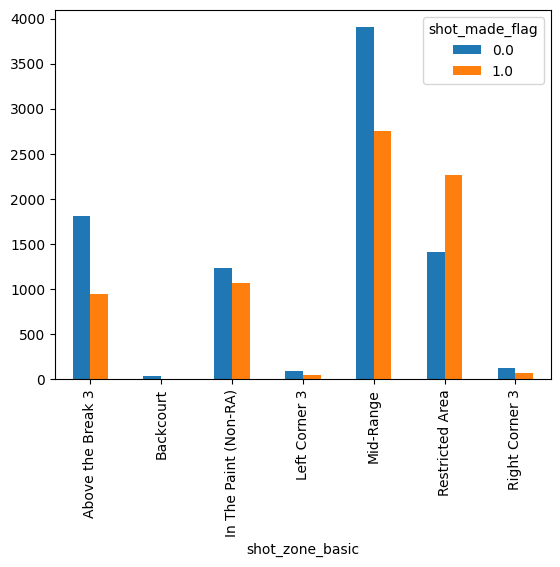

In [20]:
# a plot of the table above
pd.crosstab(KobeDataset['shot_zone_basic'], KobeDataset['shot_made_flag']).plot(kind="bar");

For numerical features, we don't have categories that we can use as the x-axis. But we can split the datapoints into bins, such as 0.0 to 0.1 and look at the number of 0 and 1 labels for that bin.

<Axes: xlabel='seconds_remaining'>

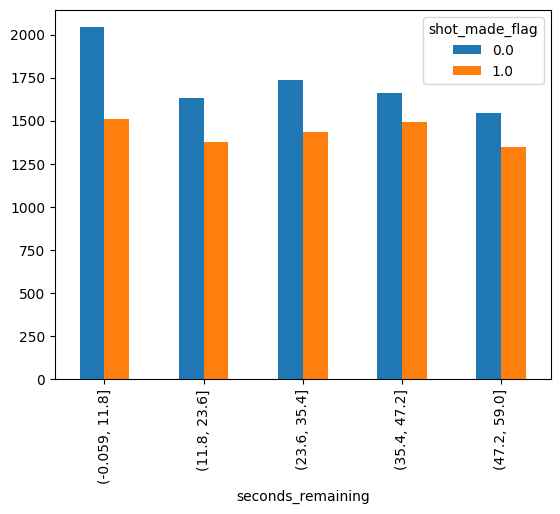

In [21]:
# For numerical variables, we can bin the amounts and check frequency of labels within each bin
pd.crosstab(pd.cut(KobeDataset["seconds_remaining"], bins= 5), KobeDataset['shot_made_flag']).plot(kind= "bar")

### EXERCISE: Visualize some of our data

Let's now visualize some of our features. Make additional plots of additional features as time allows.

Tasks:
1. Make a plot to visualize the feature `shot_distance` in relation to the target variable `shot_made_flag`. First, define the bin bounds. You can use `pd.qcut(~)` with q = 5 and no duplicates for equal sized bins. Next, use `pd.cut(~)` to split the data into those bins. Next, use `pd.crosstab(~)` to compute a simple cross tabulation. A cross tabulation (often called a crosstab) is a table that shows the relationship between two or more categorical variables by counting how many observations fall into each combination of categories. Plot this crosstab using crosstab_result.plot(~).
2. Make a plot to visualize the feature `shot_distance` in relation to the target variable `shot_made_flag`. This should be much easier than making a plot for `shot_distance`. You can use `pd.crosstab(~)` or a similar plotting function.

#### TASK 1: Plot `shot_distance`

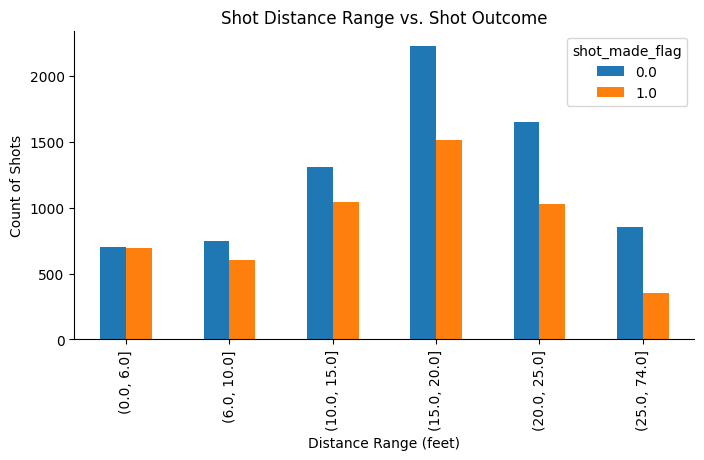

In [22]:
# TASK 1 EXERCISE


# Define bins for shot distance
distance_bins = [
    np.min(KobeDataset['shot_distance']),  # minimum distance found
    6, 10, 15, 20, 25,
    np.max(KobeDataset['shot_distance'])   # maximum distance found
]

# Group shots into distance bins
distance_groups = pd.cut(KobeDataset["shot_distance"], bins=distance_bins)

# # for equal distance bins
# distance_groups = pd.qcut(KobeDataset["shot_distance"], q=5, duplicates='drop')

# Create a crosstab comparing distance range vs. shot_made_flag
crosstab_result = pd.crosstab(distance_groups, KobeDataset['shot_made_flag'])

# Plot the crosstab as a bar chart
crosstab_result.plot(kind="bar", figsize=(8, 4))
plt.title("Shot Distance Range vs. Shot Outcome")
plt.xlabel("Distance Range (feet)")
plt.ylabel("Count of Shots")
sns.despine()
plt.show()

#### TASK 2: Plot `shot_type`

<Axes: xlabel='shot_type'>

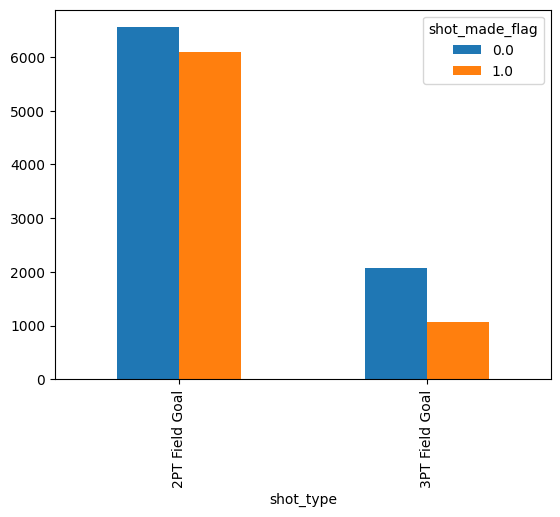

In [23]:
# TASK 2 EXERCISE

# Plot 'shot_type' versus the target variable 'shot_made_flag'
pd.crosstab(KobeDataset["shot_type"], KobeDataset['shot_made_flag']).plot(kind= "bar")

## What is Logistic Regression?

### ANALYSIS: What is logistic regression?

Tasks:
1. Run the logistic regression code, analyze the code and the output.

#### TASK 1: Run and Analyze the Logistic Regression Code

Model Accuracy: 0.59349


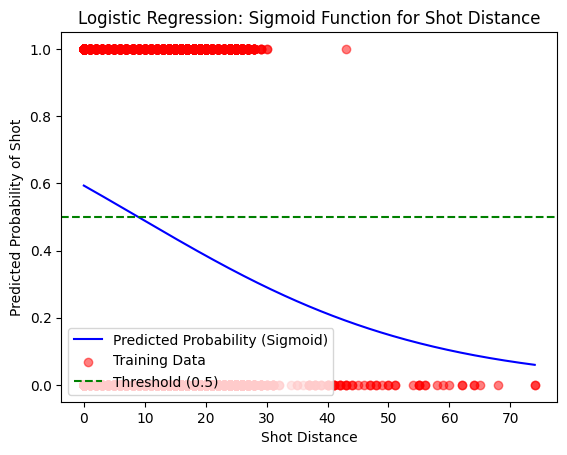

In [24]:
# TASK 1 EXERCISE

# Selecting one feature (shot_distance) for logistic regression
X = KobeDataset[['shot_distance']]  # Only using shot distance as the feature
y = KobeDataset['shot_made_flag']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model (without standardization)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

# Visualizing the sigmoid function and the threshold
def plot_sigmoid(X, model):

    # Create a range of shot distances for smooth plotting
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

    # Get predicted probabilities for this range
    y_proba = model.predict_proba(X_range)[:, 1]
    # print(y_proba)

    # Plotting the sigmoid curve
    plt.plot(X_range, y_proba, label="Predicted Probability (Sigmoid)", color="blue")
    plt.scatter(X_train, y_train, label="Training Data", alpha=0.5, color="red")
    plt.axhline(0.5, color='green', linestyle='--', label="Threshold (0.5)")
    plt.title("Logistic Regression: Sigmoid Function for Shot Distance")
    plt.xlabel("Shot Distance")
    plt.ylabel("Predicted Probability of Shot")
    plt.legend(loc = 'lower left')
    plt.show()

# Plot the sigmoid curve
plot_sigmoid(X, log_reg)

## EXERCISE: Train a Baseline Model

Tasks:
1. Fit a `LogisticRegression()` model with your own set of features. Make sure to look at the accuracy of your model and compare it to the simple case we showed above.

#### TASK 1: Fit your own `LogisticRegression()` with your own set of Features

In [25]:
# TASK 1 EXERCISE


# Selecting a set of features for logistic regression
X = KobeDataset[['shot_distance', 'seconds_remaining', 'loc_x', 'loc_y']]  # Using multiple input features as per your choosing
y = KobeDataset['shot_made_flag']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model (without standardization)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

Model Accuracy: 0.58884


## Feature Engineering

### EXERCISE: Encode Categorical Data

Tasks:
1. Encode the `shot_zone_basic` feature into one-hot encoding using the method `pd.get_dummies()`. Then, identify the shot_zone fore the 979-th datapoint.
2. Train a `LogisticRegression()` model with this new feature. You can add the new feature using the `df.join(~)` method. How many extra columns were created for this new variable? Did the accuracy improve?

#### TASK 1: Generate a One-Hot Vector Encoding of `shot_zone_basic`

In [26]:
# TASK 1 EXERCISE

# Display the frequency of each category in the 'shot_zone_basic' column
print(KobeDataset["shot_zone_basic"].value_counts())
print('\n')

# Generate one-hot encoded columns for each category in 'shot_zone_basic'
# and use 'shot_zone' as the prefix for the new columns
shot_zones = pd.get_dummies(KobeDataset["shot_zone_basic"], prefix="shot_zone")

# Show the first five rows of the resulting one-hot encoded DataFrame
shot_zones.head(5)

# Check the shot_zone for datapoint 979
shot_zones.iloc[979]

shot_zone_basic
Mid-Range                6655
Restricted Area          3676
Above the Break 3        2763
In The Paint (Non-RA)    2308
Right Corner 3            195
Left Corner 3             143
Backcourt                  34
Name: count, dtype: int64




,1177
shot_zone_Above the Break 3,False
shot_zone_Backcourt,False
shot_zone_In The Paint (Non-RA),False
shot_zone_Left Corner 3,False
shot_zone_Mid-Range,True
shot_zone_Restricted Area,False
shot_zone_Right Corner 3,False


#### TASK 2: Train your own `LogisticRegression()` with this new Categorical Variable

In [27]:
# TASK 2 EXERCISE

# Add this New Feature to your Dataset
KobeDataset.shape
KobeDataset = KobeDataset.join(shot_zones)
KobeDataset.shape

# Look at your New Columns
print(list(KobeDataset.columns))

# TRAIN A NEW LOGISTIC REGRESSION ----------------------------------------------

# Selecting a set of features for logistic regression
feat = ["minutes_remaining", "shot_distance", "loc_x", 'shot_zone_Above the Break 3', 'shot_zone_Backcourt', 'shot_zone_In The Paint (Non-RA)',
        'shot_zone_Left Corner 3','shot_zone_Mid-Range', 'shot_zone_Restricted Area', 'shot_zone_Right Corner 3']
X = KobeDataset[feat]  # Only using shot distance as the feature
y = KobeDataset['shot_made_flag']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model (without standardization)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

['action_type', 'loc_x', 'loc_y', 'shot_distance', 'shot_zone_basic', 'shot_zone_area', 'shot_type', 'period', 'minutes_remaining', 'seconds_remaining', 'playoffs', 'season', 'game_date', 'matchup', 'shot_made_flag', 'shot_zone_Above the Break 3', 'shot_zone_Backcourt', 'shot_zone_In The Paint (Non-RA)', 'shot_zone_Left Corner 3', 'shot_zone_Mid-Range', 'shot_zone_Restricted Area', 'shot_zone_Right Corner 3']
Model Accuracy: 0.60258
